# Lab 3 - ATLAS Data Analysis

**Mario Dajani Caceres**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

## Introduction

In [2]:
Mz=91.1880e3 #MeV/c^2
Mz_unc=0.002e3 #MeV/c^2
Mw=80.3692e3 #MeV/c^2
Mw_unc=0.0133e3 #MeV/c^2
Mh=125.20e3 #MeV/c^2
Mh_unc=.11e3 #MeV/c^2
Me=.51099895000 #MeV/c^2
Me_unc=.00000000015 #MeV/c^2
Mm=105.6583755 #MeV/c^2
Mm_unc=0.0000023  #MeV/c^2
Mt=1776.93 #MeV/c^2
Mt_unc=0.09  #MeV/c^2

## Part 1 - The Invariant Mass Distribution

In [3]:
#Question 1: loading data
data=np.loadtxt('atlas_z_to_ll.csv', delimiter=',',skiprows=1)
pt1=data[:,0]
pt2=data[:,1]
eta1=data[:,2]
eta2=data[:,3]
phi1=data[:,4]
phi2=data[:,5]
E1=data[:,6]
E2=data[:,7]



### Question 2

In [4]:
#Question 2: formulas
#x momentum
px1=pt1*np.cos(phi1)
px2=pt2*np.cos(phi2)
px=px1+px2

#y momentum
py1=pt1*np.sin(phi1)
py2=pt2*np.sin(phi2)
py=py1+py2

#z momentum
pz1=pt1*np.sinh(eta1)
pz2=pt2*np.sinh(eta2)
pz=pz1+pz2

#total energy
E=E1+E2

#finding Mass
M=np.sqrt(E**2-(px**2+py**2+pz**2))

### Question 3

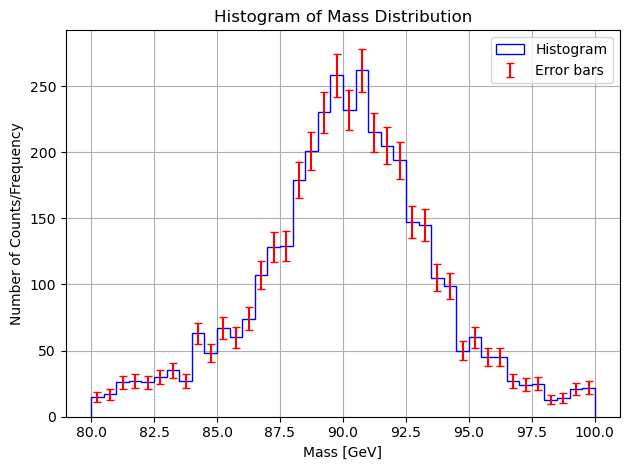

In [5]:
#Question 3: Histogram
fig,ax=plt.subplots()
bins=np.linspace(80,100,41)
count,bin_edge=np.histogram(M,bins=bins)
error=np.sqrt(count)
bin_centers=(bin_edge[:-1]+bin_edge[1:])/2
ax.hist(M,bins,histtype='step',color='blue',label='Histogram')

ax.errorbar(bin_centers,count, yerr=error, ls='', color='red', label='Error bars', capsize=3)
ax.grid(True)
ax.set_title('Histogram of Mass Distribution')
ax.set_xlabel('Mass [GeV]')
ax.set_ylabel('Number of Counts/Frequency')
fig.tight_layout()
ax.legend();


Caption: This figure represents the histogram for the number of counts that an invariant mass is measured in the ATLAS detector. It also includes the error in the counts.

## Part 2 - Breit-Wigner Fit

### Question 1

In [6]:
#Question 1: Function
def D(m,m0,G):
    num=G/2
    den=np.pi*((m-m0)**2+(G/2)**2)
    return num/den

### Question 2

In [7]:
#Question 2: fitting
mask=(bin_centers>87)&(bin_centers<93)
bin_fit=bin_centers[mask]
count_fit=count[mask]
error_fit=error[mask]

def D_norm(m,m0,G):
    return 2500*D(m,m0,G)

fit_par,pcov = scipy.optimize.curve_fit(
    f=D_norm,
    xdata=bin_fit,
    ydata=count_fit,
    sigma=error_fit,
    absolute_sigma=True,
    p0=[91,2.495])




### Question 3

6.390999660885562


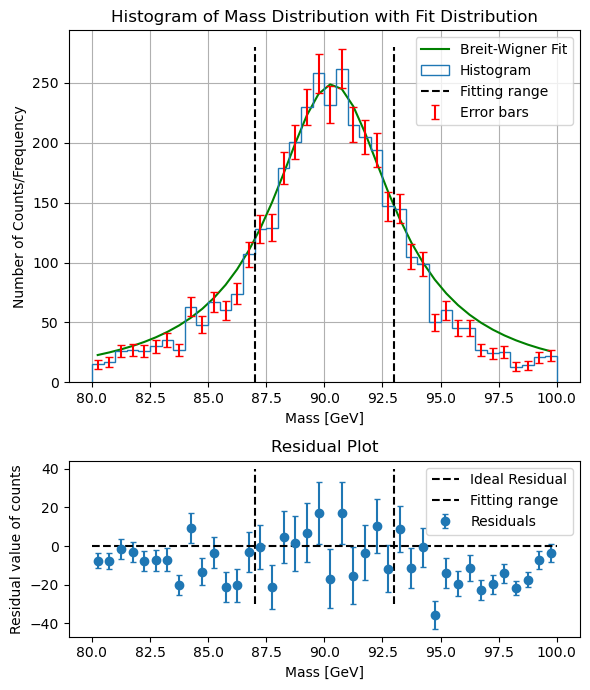

In [8]:
D_fit=D_norm(bin_centers,fit_par[0], fit_par[1])
m0_fit=fit_par[0]
G_fit=fit_par[1]
sig_m0_fit=np.sqrt(pcov[0,0])
sig_G_fit=np.sqrt(pcov[1,1])
print(G_fit)

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(6,7),height_ratios=(2,1))
ax1.plot(bin_centers,D_fit,color='green',label='Breit-Wigner Fit')
ax1.hist(M,bins=bins,histtype='step',label='Histogram')
ax1.errorbar(bin_centers,count, yerr=error, ls='', color='r', label='Error bars', capsize=3)
ax1.vlines(87,0,280,label='Fitting range',ls='--',color='black')
ax1.vlines(93,0,280,ls='--',color='black')

ax1.grid(True)
ax1.set_title('Histogram of Mass Distribution with Fit Distribution')
ax1.set_xlabel('Mass [GeV]')
ax1.set_ylabel('Number of Counts/Frequency')
ax1.legend()


residuals=-D_fit+count
ax2.errorbar(bin_centers,residuals,yerr=error,ls='',capsize=2,marker='o',label='Residuals')
ax2.hlines(0,80,100,ls='--',color='k', label='Ideal Residual')
ax2.vlines(87,-30,40,label='Fitting range',ls='--',color='black')
ax2.vlines(93,-30,40,ls='--',color='black')
ax2.set_title('Residual Plot')
ax2.set_xlabel('Mass [GeV]')
ax2.set_ylabel('Residual value of counts')
ax2.legend()
fig.tight_layout();


Caption: These figures include the histogram plot for the invariant mass of the ATLAS detector. It also includes the fit for the histogram and the error of the counts. Also, there is the residual plot where we measure the difference between the fit and the measurements, this plot also includes errorbars.

### Question 4

In [9]:
from scipy import stats
D_fit_range=D_norm(bin_fit,fit_par[0], fit_par[1])
chisq=np.sum(((count_fit-D_fit_range)/error_fit)**2)
dof=len(count_fit)-len(fit_par)
red_chisq=chisq/(dof)

print(f'The chisq is {chisq}')
print(f'The reduced chisq is {red_chisq}')
pval=stats.distributions.chi2.sf(chisq,dof)
print(f'The p value is {pval}')
print(f'The degrees of freedom is {dof}')

The chisq is 9.985097164347996
The reduced chisq is 0.9985097164347996
The p value is 0.44180173855532334
The degrees of freedom is 10


### Question 5

In [10]:
print(f'The best fit for mass m0 is {m0_fit} +- {sig_m0_fit} GeV')

The best fit for mass m0 is 90.34080509017936 +- 0.09351524685678202 GeV


### Question 6

''

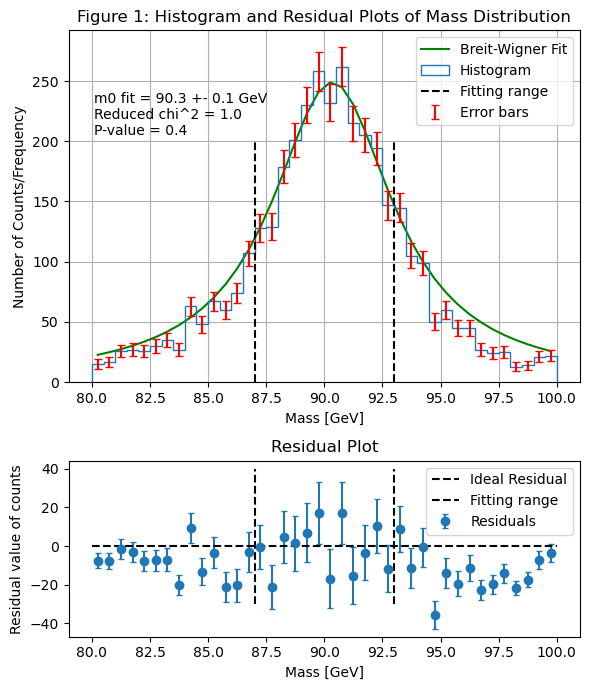

In [11]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(6,7),height_ratios=(2,1))
ax1.plot(bin_centers,D_fit,color='green',label='Breit-Wigner Fit')
ax1.hist(M,bins=bins,histtype='step',label='Histogram')
ax1.errorbar(bin_centers,count, yerr=error, ls='', color='r', label='Error bars', capsize=3)
ax1.vlines(87,0,200,label='Fitting range',ls='--',color='black')
ax1.vlines(93,0,200,ls='--',color='black')

ax1.grid(True)
ax1.set_title('Figure 1: Histogram and Residual Plots of Mass Distribution')
ax1.set_xlabel('Mass [GeV]')
ax1.set_ylabel('Number of Counts/Frequency')
ax1.legend()
ax2.errorbar(bin_centers,residuals,yerr=error,ls='',capsize=2,marker='o',label='Residuals')
ax2.hlines(0,80,100,ls='--',color='k', label='Ideal Residual')
ax2.vlines(87,-30,40,label='Fitting range',ls='--',color='black')
ax2.vlines(93,-30,40,ls='--',color='black')
ax2.set_title('Residual Plot')
ax2.set_xlabel('Mass [GeV]')
ax2.set_ylabel('Residual value of counts')
ax2.legend()
fig.tight_layout()

ax1.text(s=f'm0 fit = {m0_fit:.1f} +- {sig_m0_fit:.1f} GeV\nReduced chi^2 = {red_chisq:.1f}\nP-value = {pval:.1f}',x=80.1,y=205)
;

Fig 1 Caption: These figures include the histogram plot for the invariant mass of the ATLAS detector. It also includes the fit for the histogram and the error of the counts. Also, there is the residual plot where we measure the difference between the fit and the measurements, this plot also includes errorbars. In the main plot, we also can idntify the fit value for the mass of the particle, the reduced chi^2 and P value between the fit and data. From our chi^2 and p value calculations, we can see that the comparison between the fit and data is in agreement since the p value is over 0.05 and under 0.95.

## Part 3 - 2D Parameter Contours

### Question 1

In [12]:
Z0_vals=np.linspace(89,91,300)
G_vals=np.linspace(5,8,300)
Z0_grid,G_grid=np.meshgrid(Z0_vals,G_vals)

chi2_grid=np.zeros((len(G_vals),len(Z0_vals)))

for i in range(len(G_vals)):
    G=G_vals[i]
    for j in range(len(Z0_vals)):
        Z0=Z0_vals[j]
        model_vals=D_norm(bin_fit,Z0,G)
        chi2 = np.sum(((count_fit - model_vals) / error_fit)**2)
        chi2_grid[i, j] = chi2


### Question 2

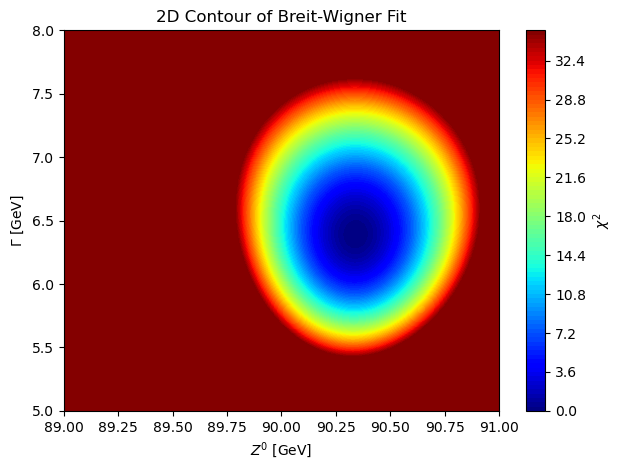

In [13]:
fig, ax = plt.subplots()
X, Y = np.meshgrid(Z0_vals, G_vals)
delta_chi2=chi2_grid-np.min(chi2_grid)
delta_chi2_clip = np.clip(delta_chi2, 0, 35)
cbar = ax.contourf(X, Y,delta_chi2_clip , levels=100, cmap='jet')
fig.colorbar(cbar, ax=ax, label=r'$\chi^2$')
ax.set_xlabel(r'$Z^0$ [GeV]')
ax.set_ylabel(r'$\Gamma$ [GeV]')
ax.set_title(r'2D Contour of Breit-Wigner Fit')
fig.tight_layout();

Caption: This figure represents the chi2 contour plot for different values of Z0 and Gamma, we can see where the fit gets better when the colors change and get more blue.

### Question 3

''

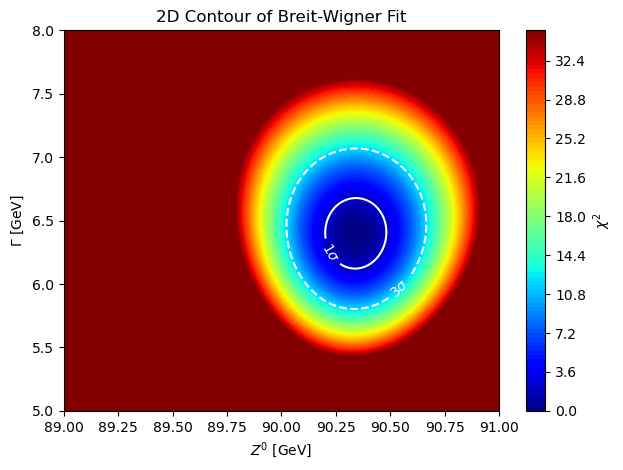

In [14]:
fig,ax=plt.subplots()
cbar = ax.contourf(X, Y,delta_chi2_clip , levels=100, cmap='jet')
fig.colorbar(cbar, ax=ax, label=r'$\chi^2$')
ax.set_xlabel(r'$Z^0$ [GeV]')
ax.set_ylabel(r'$\Gamma$ [GeV]')
ax.set_title(r'2D Contour of Breit-Wigner Fit')
fig.tight_layout()

chisq_sig1=2.30
chisq_sig3=11.83
contour_lines = ax.contour(Z0_vals, G_vals, delta_chi2, 
                           levels=[chisq_sig1, chisq_sig3], 
                           colors=['white', 'white'], linestyles=['-', '--'], linewidths=1.5)
ax.clabel(contour_lines, fmt={chisq_sig1: r'1$\sigma$', chisq_sig3: '3$\sigma$'}, fontsize=10)

;

Caption: This 2D countour plot of the chisq values for different Gammas and Z0 includes labels for when the chisq represents 1 and 3 sigma.

### Question 4

''

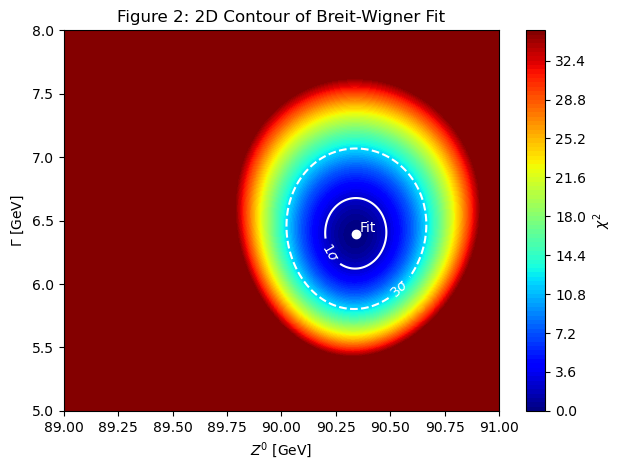

In [15]:
fig,ax=plt.subplots()
cbar = ax.contourf(X, Y,delta_chi2_clip , levels=100, cmap='jet')
fig.colorbar(cbar, ax=ax, label=r'$\chi^2$')
ax.set_xlabel(r'$Z^0$ [GeV]')
ax.set_ylabel(r'$\Gamma$ [GeV]')
ax.set_title(r'Figure 2: 2D Contour of Breit-Wigner Fit')
fig.tight_layout()

chisq_sig1=2.30
chisq_sig3=11.83
contour_lines = ax.contour(Z0_vals, G_vals, delta_chi2, 
                           levels=[chisq_sig1, chisq_sig3], 
                           colors=['white', 'white'], linestyles=['-', '--'], linewidths=1.5)
ax.clabel(contour_lines, fmt={2.30: r'1$\sigma$', 11.83: '3$\sigma$'}, fontsize=10)
ax.plot(m0_fit,G_fit,color='white',marker='o')
ax.text(m0_fit+.02,G_fit+.02,'Fit', color='white')
;

Fig 2 Caption: This figure represents the chi2 contour plot for different values of Z0 and Gamma, we can see where the fit gets better when the colors change and get more blue. We also have labels for when the chi^2 represents 1 sigma and 3 sigma. We have also marked the spot where our fits for m0 and G is located within this plot, and we can see that it is within the 1 sigma chi^2 comparison.